In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet


import requests
import json
from pandas.io.json import json_normalize 
import seaborn as sns

In [2]:
#urls
d = dict([("BTC_2h_url", 25)])
BTC_2h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000&aggregate=2&e=CCCAGG'
BTC_6h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000&aggregate=6&e=CCCAGG'
BTC_12h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000&aggregate=12&e=CCCAGG'
BTC_24h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000&aggregate=24&e=CCCAGG'


In [3]:
#requests

BTC_2h_response = requests.get(BTC_2h_url)
BTC_6h_response = requests.get(BTC_6h_url)
BTC_12h_response = requests.get(BTC_12h_url)
BTC_24h_response = requests.get(BTC_24h_url)


if (BTC_2h_response.status_code == 200):
    BTC_2h = (BTC_2h_response.json())
    BTC_2h = json_normalize(BTC_2h['Data'])
    BTC_2h['time'] = pd.to_datetime(BTC_2h['time'], unit='s')
    BTC_2h_noIdenx = BTC_2h.set_index('time')
if (BTC_6h_response.status_code == 200):
    BTC_6h = (BTC_6h_response.json())
    BTC_6h = (BTC_6h_response.json())
    BTC_6h = json_normalize(BTC_6h['Data'])
    BTC_6h['time'] = pd.to_datetime(BTC_6h['time'], unit='s')
if (BTC_12h_response.status_code == 200):
    BTC_12h = (BTC_12h_response.json())
    BTC_12h = (BTC_12h_response.json())
    BTC_12h = json_normalize(BTC_12h['Data'])
    BTC_12h['time'] = pd.to_datetime(BTC_12h['time'], unit='s')
if (BTC_24h_response.status_code == 200):
    BTC_24h = (BTC_24h_response.json())
    BTC_24h = (BTC_24h_response.json())
    BTC_24h = (BTC_24h_response.json())
    BTC_24h = json_normalize(BTC_24h['Data'])
    BTC_24h['time'] = pd.to_datetime(BTC_24h['time'], unit='s')


In [4]:
BTC_12h.head(1)

,close,high,low,open,time,volumefrom,volumeto
0,9906.04,9969.58,9780.2,9924.08,2017-11-28 12:00:00,47132.99,4.671917e+08


In [5]:
btc_intervals = [BTC_2h, BTC_6h, BTC_12h, BTC_24h]
first_dates = []
last_dates = []
for df in range(len(btc_intervals)):
    last = len(btc_intervals[df]) - 1
    first_dates.append(btc_intervals[df]['time'].iloc[0])
    last_dates.append(btc_intervals[df]['time'].iloc[last])

#NEED to iterate over everything else


/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


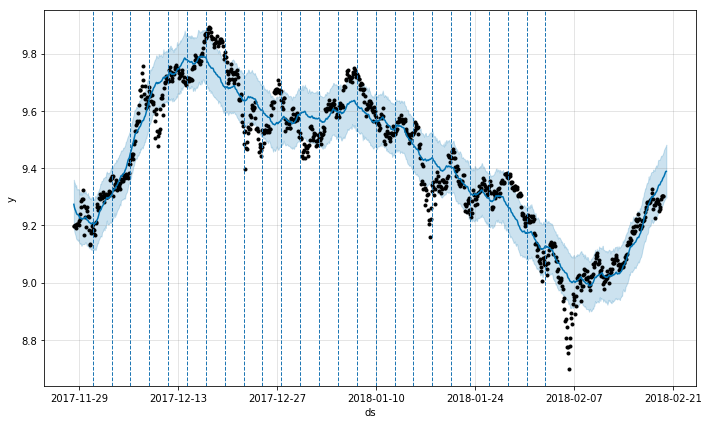

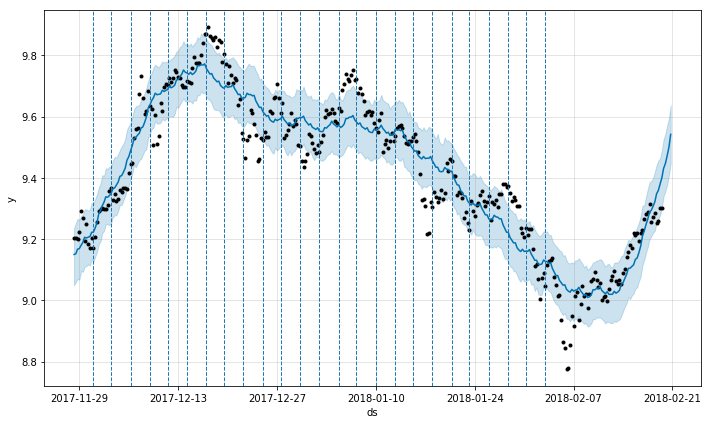

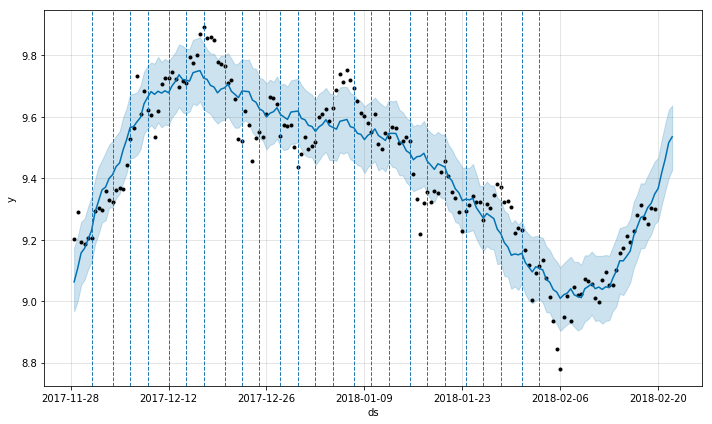

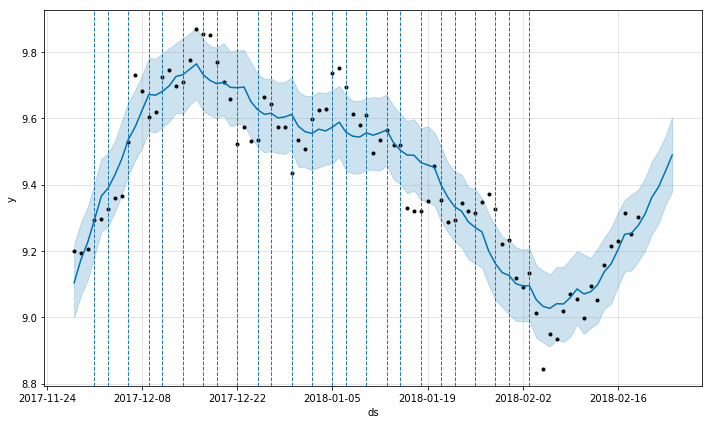

In [6]:
btc_intervals = [BTC_2h, BTC_6h, BTC_12h, BTC_24h]
btc_timeperiods = ['2h', '6h', '12h', '24h']
def changeToProphet(df):
    df = df[['close', 'time']]
    df = df.rename(columns={'close': 'y', 'time': 'ds'})
    df['y'] = np.log(df['y'])
    return df

def runProphetPrediction(df, periods, scale, frequency):
    m = Prophet(changepoint_prior_scale=scale, yearly_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=periods, freq=frequency)
    forecast = m.predict(future)
    #This is causing issues for soe reason. Or maybe its right. It is plotting the lines at different levels
    forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    m.plot(forecast)
    for changepoint in m.changepoints:
        plt.axvline(changepoint,ls='--', lw=1)


    
for i in range(len(btc_intervals)):
    btc_intervals[i] = changeToProphet(btc_intervals[i])
    runProphetPrediction(btc_intervals[i], 5, 0.005, btc_timeperiods[i])
    


In [13]:
def runSingleProphetPredictionData(df, periods, scale, frequency):
    m = Prophet(changepoint_prior_scale=scale, yearly_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=periods, freq=frequency)
    forecast = m.predict(future)
    #forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    return forecast

runSingleProphetPredictionData(btc_intervals[0], 5, 0.005, btc_timeperiods[0])


/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2017-11-28 06:00:00,9.826520,9.826520,9.826520,9.179857,9.366761,-0.000039,-0.000039,-0.000039,-0.553054,...,-0.553054,-0.553054,-0.553054,-0.019741,-0.019741,-0.019741,-0.533274,-0.533274,-0.533274,9.273466
1,2017-11-28 08:00:00,9.825823,9.825823,9.825823,9.172333,9.352245,-0.002709,-0.002709,-0.002709,-0.562680,...,-0.562680,-0.562680,-0.562680,-0.021265,-0.021265,-0.021265,-0.538707,-0.538707,-0.538707,9.263143
2,2017-11-28 10:00:00,9.825125,9.825125,9.825125,9.171476,9.348667,-0.002838,-0.002838,-0.002838,-0.569203,...,-0.569203,-0.569203,-0.569203,-0.022490,-0.022490,-0.022490,-0.543875,-0.543875,-0.543875,9.255922
3,2017-11-28 12:00:00,9.824427,9.824427,9.824427,9.154796,9.338157,-0.000818,-0.000818,-0.000818,-0.572949,...,-0.572949,-0.572949,-0.572949,-0.023350,-0.023350,-0.023350,-0.548781,-0.548781,-0.548781,9.251478
4,2017-11-28 14:00:00,9.823730,9.823730,9.823730,9.153394,9.331945,-0.001529,-0.001529,-0.001529,-0.578747,...,-0.578747,-0.578747,-0.578747,-0.023789,-0.023789,-0.023789,-0.553429,-0.553429,-0.553429,9.244983
5,2017-11-28 16:00:00,9.823032,9.823032,9.823032,9.152754,9.332998,-0.001648,-0.001648,-0.001648,-0.583236,...,-0.583236,-0.583236,-0.583236,-0.023767,-0.023767,-0.023767,-0.557822,-0.557822,-0.557822,9.239796
6,2017-11-28 18:00:00,9.822335,9.822335,9.822335,9.149325,9.329052,0.000711,0.000711,0.000711,-0.584512,...,-0.584512,-0.584512,-0.584512,-0.023261,-0.023261,-0.023261,-0.561962,-0.561962,-0.561962,9.237823
7,2017-11-28 20:00:00,9.821637,9.821637,9.821637,9.156259,9.325440,0.003554,0.003554,0.003554,-0.584568,...,-0.584568,-0.584568,-0.584568,-0.022269,-0.022269,-0.022269,-0.565853,-0.565853,-0.565853,9.237069
8,2017-11-28 22:00:00,9.820940,9.820940,9.820940,9.139059,9.325794,0.005461,0.005461,0.005461,-0.584847,...,-0.584847,-0.584847,-0.584847,-0.020809,-0.020809,-0.020809,-0.569498,-0.569498,-0.569498,9.236093
9,2017-11-29 00:00:00,9.820242,9.820242,9.820242,9.137229,9.318833,0.002799,0.002799,0.002799,-0.589021,...,-0.589021,-0.589021,-0.589021,-0.018920,-0.018920,-0.018920,-0.572900,-0.572900,-0.572900,9.231221


## SMA Cross Overs

In [8]:
btc_intervals_timeIndex = [BTC_2h, BTC_6h, BTC_12h, BTC_24h]
for i in range(len(btc_intervals)):
    btc_intervals_timeIndex[i] = btc_intervals_timeIndex[i].set_index('time')
    btc_intervals_timeIndex[i]['sma5'] = btc_intervals_timeIndex[i]['close'].rolling(5).mean()
    btc_intervals_timeIndex[i]['sma10'] = btc_intervals_timeIndex[i]['close'].rolling(10).mean()
    btc_intervals_timeIndex[i]['sma20'] = btc_intervals_timeIndex[i]['close'].rolling(20).mean()
    btc_intervals_timeIndex[i]['sma50'] = btc_intervals_timeIndex[i]['close'].rolling(50).mean()


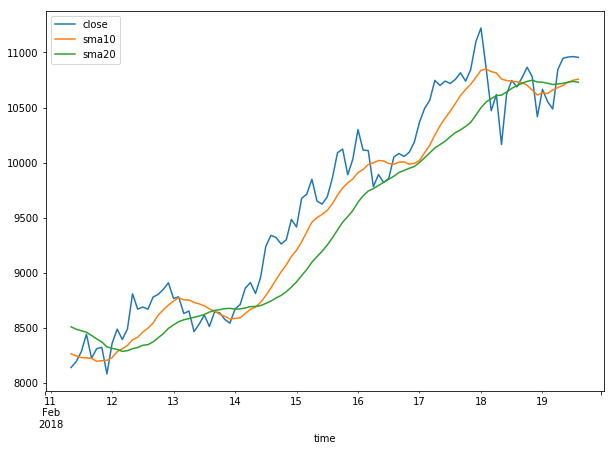

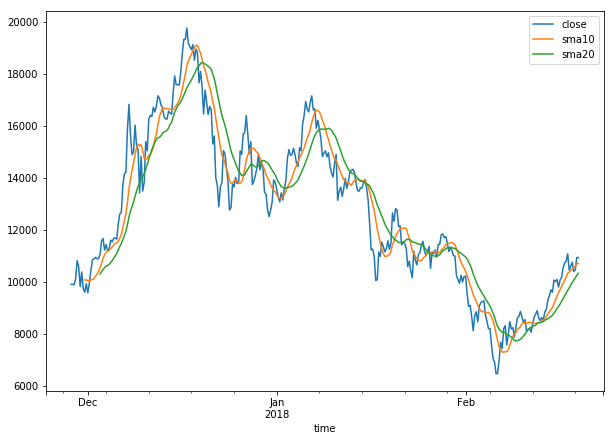

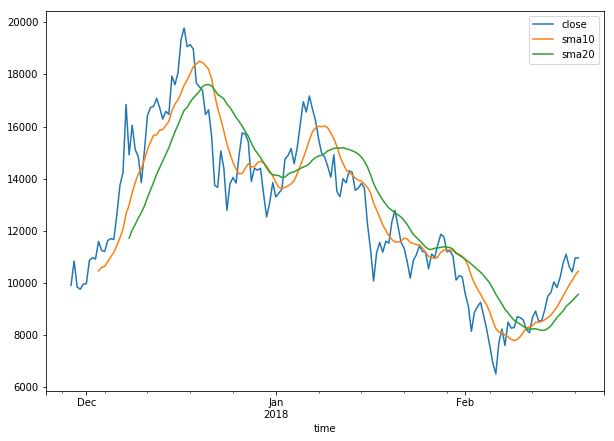

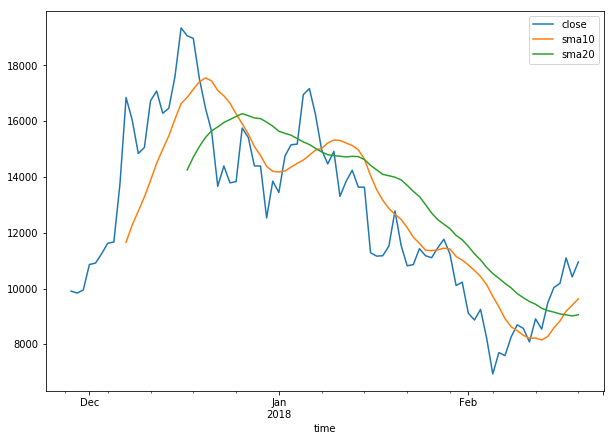

In [10]:
smaplot = btc_intervals_timeIndex
for i in range(len(smaplot)):
    if i == 0:
        smaplot[i] = smaplot[i].tail(100)
        smaplot[i] = smaplot[i][['close', 'sma10', 'sma20']].plot(figsize=[10,7])
    else:
        smaplot[i] = smaplot[i][['close', 'sma10', 'sma20']].plot(figsize=[10,7])

## Sentiment

In [14]:
import tweepy as twpy
from textblob import TextBlob
consumer_key = 'fba8sGRIIg0EoQOtfgxHGv7EI'
consumer_secret = 'z8LKzW9epwOPWsYfE1QXIApFlo1VrbM6rGP9K7zdr9tXa3TocS'
access_token = '893107128092606465-r9EFEkdoAoQyuHEOSMrQMdvUG7rAOBO'
access_token_sedret = 'ZeGap5yg7GF7WdJ31wG2vb3NxVALCH5PUJj6hsCPPOv5e'
auth = twpy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_sedret)
api = twpy.API(auth)

In [17]:
users = ['BTCTN', 'kyletorpey', 'hodlhodl', 'bravenewcoin', 'coindesk', 'Cointelegraph']
dates = []
tweets = []
idString = []
userName = []
for i in range(len(users)):
    user = users[i]
    for status in twpy.Cursor(api.user_timeline, screen_name=user ).items(2900):
        dates.append(status.created_at)
        tweets.append(status.text)
        userName.append(status.user.name)

INFO:tweepy.binder:PARAMS: {'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'965451932558155775', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'964947321464254463', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'964480373873938432', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'964088224137252863', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'963697622157586431', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'963247084735475711', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'962861851460755455', 'screen_name': b'BTCTN'}
INFO:tweepy.bind

INFO:tweepy.binder:PARAMS: {'max_id': b'939775731634016255', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'939302356319113215', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'938968393427963903', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'938589713761435647', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'938236564051722239', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'937890549188775935', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'937601218309914623', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'937245166024429567', 'screen_

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'910052511540752383', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'909152226538655743', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'908354259833540612', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'907704266198065154', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'907153106638659583', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'906317499737755657', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'905840473696325631', 'screen_name': b'BTCTN'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PAR

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'956241629148536831', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'956212298103820288', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'956037109210603520', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'955911564183457792', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'955878693800308735', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'955852226739736575', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'955602118873927679', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'creat

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'946053894261665791', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'945758304445390847', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'945693334537932801', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'945384475487342592', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'944217507308752895', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'943948547300487169', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'943920548710617087', 'screen_name': b'kyletorpey'}
INFO:tweepy.binder:PARAMS: {'creat

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934582670729805824', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934408256096735231', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934042924744142847', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'930824430095347713', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'927933939150233599', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'926108852499767295', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'923245477583380480', 'screen_name': b'hodlhodl'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
I

INFO:tweepy.binder:PARAMS: {'max_id': b'952994753511006207', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'952696862871576575', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'952330431445155840', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'951967996611772415', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'951666002147737599', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'951364048167215103', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'951122424963018753', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:P

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934922231901229055', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934514551927787520', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'934179684937617407', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'933909030426132480', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'933607041968377856', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'933365426762821636', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'933003082652270596', 'screen_name': b'bravenewcoin'}
INFO:tweepy.binder:P

INFO:tweepy.binder:PARAMS: {'max_id': b'961315900510101504', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'961279025745457151', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'961258764019142656', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'961194747649036287', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'960926203048800257', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'960907502782173185', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'960888411258277893', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'96071334

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'943460358269947904', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'943247840410832895', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'943013598066020352', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'942722961273958399', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'942032697731534848', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'941669415287914495', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'941398136370720768', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
I

INFO:tweepy.binder:PARAMS: {'max_id': b'924999407032029184', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'924028456383516671', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'923730983106605055', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'923535206153408511', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'923267935057207296', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'923067491819155456', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'922849819437170690', 'screen_name': b'coindesk'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'92267578

INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'947174669639208960', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'946755189859606527', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'946383067710656511', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'946028606786023424', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'945695525684121605', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'945279777551855615', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'944628669137543167', 'screen_name': b'Cointelegraph'}
INFO:tweepy.b

INFO:tweepy.binder:PARAMS: {'max_id': b'930397290338160640', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'930040703417245695', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'929495227437649919', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'929008163399131136', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'928917675933421572', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'928608795626008575', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.binder:PARAMS: {'max_id': b'928329112514695171', 'screen_name': b'Cointelegraph'}
INFO:tweepy.binder:PARAMS: {'create': b'True'}
INFO:tweepy.b

In [18]:
combinedTweets = pd.DataFrame({
    'dates': dates,
    'tweets': tweets,
    'user': userName
})    
combinedTweets = combinedTweets.sort_values('dates')
combinedTweets.tail()

,dates,tweets,user
9297,2018-02-19 21:03:32,Who Said What About Coinbase and Visa's User P...,CoinDesk
12200,2018-02-19 21:48:57,New Wyoming bill proposes to exempt #cryptocur...,Cointelegraph — Bitcoin and Cryptocurrency News
12199,2018-02-19 21:52:31,Switzerland is Becoming a “#Crypto Nation” :\n...,Cointelegraph — Bitcoin and Cryptocurrency News
12198,2018-02-19 22:05:02,There's not many things you can get completed ...,Cointelegraph — Bitcoin and Cryptocurrency News
12197,2018-02-19 22:15:34,#CT_quotes While Herjavec predicts that #Bitco...,Cointelegraph — Bitcoin and Cryptocurrency News


In [39]:
combinedTweets['sentiment-polarity'] = combinedTweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
combinedTweets['sentiment-subjectivity'] = combinedTweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)


In [15]:
#getting last and first date of time periods. 

btc_sentiment = [BTC_2h, BTC_6h, BTC_12h, BTC_24h]


lastDates = []
firstDates = []
for i in range(len(btc_sentiment)):
    last = len(btc_sentiment[i]) - 1
    firstDate = btc_sentiment[i]['time'].iloc[0]
    lastDate =  btc_sentiment[i]['time'].iloc[last]
    lastDates.append(lastDate)
    firstDates.append(firstDate)



In [41]:
#Tweet are resampled to a 120 min time interval. This may need to be adjusted for each time period. 
timePeriods = ['120Min', '360Min', '720Min', '1440Min']
tweetTimeSentiment = combinedTweets[['dates', 'sentiment-polarity', 'sentiment-subjectivity']]
tweetTimeSentiment['dates'] = pd.to_datetime(tweetTimeSentiment['dates'])
tweetTimeSentimentPeriods = ['tweetTimeSentimentPeriods2hr', 'tweetTimeSentimentPeriods6hr', 'tweetTimeSentimentPeriods12hr', 'tweetTimeSentimentPeriods24hr']



for i in range(len(lastDates)):
    tweetTimeSentimentPeriods[i] = tweetTimeSentiment.resample(rule=timePeriods[i], on='dates').mean()
    tweetTimeSentimentPeriods[i] = tweetTimeSentiment.fillna(0)
    tweetTimeSentiment = tweetTimeSentiment.set_index('dates')
    mask = (tweetTimeSentiment[i].index > firstDates[i]) & (tweetTimeSentiment[i].index <= lastDates[i])
    tweetTimeSentimentPeriods[i] = tweetTimeSentimentPeriods[i].iloc[mask]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


KeyError: 0

## Getting Started WIth Backtesting using ZipLine

In [11]:
from zipline.api import order_target, record, symbol

ModuleNotFoundError: No module named 'zipline'